# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy import stats

In [21]:
# Your code here.
student_data = pd.DataFrame({"Age": [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], "Tardies": [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data.index +=1
student_data.index = student_data.index.rename("StudentID")

Draw a dispersion diagram (scatter plot) for the data.

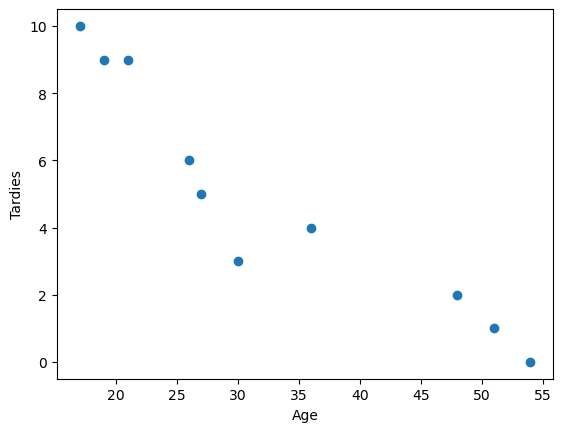

In [26]:
# Your code here.
plt.scatter(student_data.Age, student_data.Tardies)
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# From the scatter plot the we can see the trend that younger the student they are more likely to be late and vice versa. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [32]:
# Your response here.
#correlation:
print(f"The correlation between student age and tardiness is: {student_data.Age.corr(student_data.Tardies)}")

#covariance:
print(f"The covariance between student age and student tardiness is: {student_data.Age.cov(student_data.Tardies)}")

"""
Correlation coefficient is a standardized measure of the linear relationship between two variables, 
which means it has no units and its value range between -1 and 1. It is calculated as the ratio of the covariance
between the variables to the product of their standard deviations. In this example: the correlation coeff of -0.94 
represent that the age and tarddiness are perfect negatively correlated with each other

Covariance is a measure of how two variables change together. It is calculated as the average of the product of the deviations
of each variable from its mean. A positive covariance indicates that the variables tend to move in the same direction,
while a negative covariance indicates that the variables tend to move in opposite directions. 
However, unlike correlation the magnitude of the covariance is difficult to interpret since it depends on the units of the variables. In out example: 
the covariance of -45.57 indicates that the two variable moves in opposite direction but by what magnitude is hard to tell. 
"""

The correlation between student age and tardiness is: -0.9391626886887122
The covariance between student age and student tardiness is: -45.56666666666666


'\nCorrelation coefficient is a standardized measure of the linear relationship between two variables, \nwhich means it has no units and its value range between -1 and 1. It is calculated as the ratio of the covariance\nbetween the variables to the product of their standard deviations. In this example: the correlation coeff of -0.94 \nrepresent that the age and tarddiness are perfect negatively correlated with each other\n\nCovariance is a measure of how two variables change together. It is calculated as the average of the product of the deviations\nof each variable from its mean. A positive covariance indicates that the variables tend to move in the same direction,\nwhile a negative covariance indicates that the variables tend to move in opposite directions. \nHowever, unlike correlation the magnitude of the covariance is difficult to interpret since it depends on the units of the variables. In out example: \nthe covariance of -45.57 indicates that the two variable moves in opposite d

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [47]:
# Your response here.
# The outcome variable for this regression model will be Tardiness which is dependent on the age of student. 
# for this model i am using linear regression which mode the linear remationship between a dependent variable and one or more indenpendent variable
# Assuming that there is linear relationship between the dependent variable and the indenpendent variable, 
#and futrher seeks to find the equation of the straight line that best fits the data. 

# Lets, initialize the model
model = linear_model.LinearRegression()

# Now fit model in our data
result = model.fit(student_data[["Age"]], student_data[["Tardies"]])

# Now, define a regression line:
regression_line = result.intercept_ + result.coef_[0]*student_data["Age"]

display(result.coef_)
display(result.intercept_)
# under this model, the average student has baseline tardiness of 12.89 when the age is 0, 
# as age increase by each point the tardiness will decrease by 0.24

array([[-0.24282077]])

array([12.88880336])

Plot your regression model on your scatter plot.

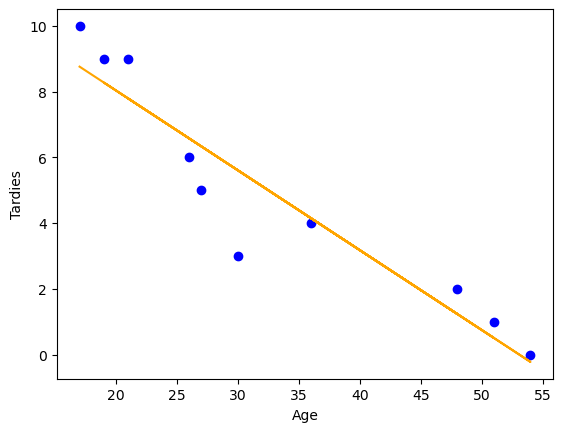

In [43]:
# Your code here.
plt.scatter(student_data.Age, student_data.Tardies, c = "blue")
plt.plot(student_data.Age, regression_line, c = "orange")
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [59]:
# Your response here. 
# to check the result of the model lets manually check the prediction of the model by feeding ages [70, 35, 19]
display(result.intercept_ + result.coef_[0]*47)
display(result.intercept_ + result.coef_[0]*35)
display(result.intercept_ + result.coef_[0]*19)
#  the predicted result of model are quiet close to the data in out data
# lets check the how much of the variability of the dependent variable is explained by the independent variable using r-squared: 
result.score(student_data[["Age"]], student_data[["Tardies"]])

# r-squared of the 0.82 means that the model is able to account for 82% of the variability in the dependent
# variable "Tardies" can be explained by independent variable age

display(mean_squared_error(result.predict(student_data[["Age"]]),student_data[["Tardies"]]))


array([1.47622713])

array([4.39007638])

array([8.27520872])

1.3319201847356268

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [63]:
# Import any libraries you may need & the data
vehicle = pd.read_csv("vehicles.csv")
vehicle.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [85]:
# Your response here. 
list_variable = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']

corr_coef = {}

for ele in list_variable:
    corr, p  = stats.pearsonr(vehicle["CO2 Emission Grams/Mile"], vehicle[ele])
    corr_coef[ele] = corr

print(corr_coef)

# based on the resulting correlation coefficient the important varaible describing co2 emission is fuel barrrels year followed by fuel cost year
# and cylinders however in contrast of all combined MPG has the negative correlation with the co2 emission. The least helpful for providing information of co2 emission is year. 


{'Year': -0.22229960295054224,
 'Cylinders': 0.7523925537297491,
 'Fuel Barrels/Year': 0.986188662142873,
 'Combined MPG': -0.9262290389336449,
 'Fuel Cost/Year': 0.9308651512201838}

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [101]:
# Your response here. 
x = vehicle[["CO2 Emission Grams/Mile"]]
y = vehicle[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
# initialize the model

model = linear_model.LinearRegression()

# Train the model with our data
model.fit(x,y)

display(model.intercept_)
display(model.coef_)








"""Here we are predicting the amount of CO2 emission caused by different variables, 
the predicting variable is continuous in nature so in this case i am using linear regression. 
According to this model 66% of variability in dependent variable are explained by independent variables."""

array([2.00966677e+03, 4.92752442e-01, 2.10138525e-02, 3.88335103e+01,
       8.63127456e+00])

array([[-0.01883035],
       [ 0.01109224],
       [ 0.03700281],
       [-0.0397718 ],
       [ 3.96360704]])

'Here we are predicting the amount of CO2 emission caused by different variables, \nthe predicting variable is continuous in nature so in this case i am using linear regression. \nAccording to this model 66% of variability in dependent variable are explained by independent variables.'

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [108]:
# Your response here. 
display(model.coef_)
display(model.intercept_)
pred = model.predict(x)
print(np.sqrt(mean_squared_error(pred, y)))
r_squared = model.score(x,y)
print(r_squared)

"""
These coefficients represent the change in the response variable (CO2 Emission Grams/Mile) associated with a
one-unit increase in each predictor variable, holding all other predictor variables constant. For example,
for a one-unit increase in "Fuel Cost/Year", we would expect to see an increase of approximately 3.96 units in CO2 Emission Grams/Mile,
assuming all other predictors are held constant.
 """


array([[-0.01883035],
       [ 0.01109224],
       [ 0.03700281],
       [-0.0397718 ],
       [ 3.96360704]])

array([2.00966677e+03, 4.92752442e-01, 2.10138525e-02, 3.88335103e+01,
       8.63127456e+00])

82.95687680962442
0.6624979816078372


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [113]:
# Your code here.
invite = pd.DataFrame({"invited": [1,3,4,6,8,9,11,14], "real": [1,2,4,4,5,7,8,13]})
invite

,invited,real
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

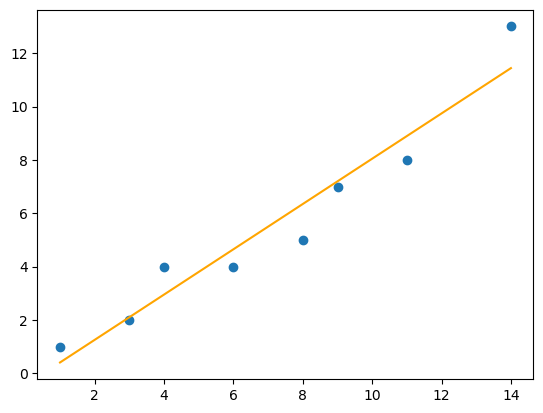

0.9316696375519905

In [153]:
# Your code here.


x = invite[["invited"]]
y = invite[["real"]]

# initialize the model for regression
model = linear_model.LinearRegression()

# train the model with the data
model.fit(x,y)

# make regression line:
regression_line = model.intercept_ + model.coef_[0]*x

# plot the data in  scatter diagram
plt.scatter(invite.invited, invite.real)
plt.plot(x, regression_line, c = "orange")
plt.show()

model.score(x,y)







What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [150]:
# Your response here. 
predicted = model.predict(x)
print(predicted)
print(invite.real)

residuals = invite[["real"]] - predicted
print(residuals)


# Based on the given data, we can say that the relationship between the two variables is likely to be linear.
# This is because the predicted result from the regression line follows a roughly linear pattern as the values of the independent variable increase.


[[ 0.40909091]
 [ 2.10606061]
 [ 2.95454545]
 [ 4.65151515]
 [ 6.34848485]
 [ 7.1969697 ]
 [ 8.89393939]
 [11.43939394]]
0     1
1     2
2     4
3     4
4     5
5     7
6     8
7    13
Name: real, dtype: int64
       real
0  0.590909
1 -0.106061
2  1.045455
3 -0.651515
4 -1.348485
5 -0.196970
6 -0.893939
7  1.560606


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

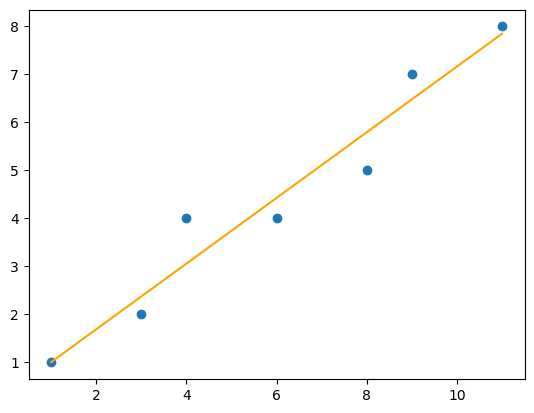

[[1.0075188 ]
 [2.37593985]
 [3.06015038]
 [4.42857143]
 [5.79699248]
 [6.48120301]
 [7.84962406]]
0    1
1    2
2    4
3    4
4    5
5    7
6    8
Name: real, dtype: int64
       real
0 -0.007519
1 -0.375940
2  0.939850
3 -0.428571
4 -0.796992
5  0.518797
6  0.150376


0.9433811802232854

In [155]:
# Your response here. 

# There is one data point [14, 11] with the highest residual, which might be driving the regression line to greater distance
# lets try remove and test again:
# removing [11,14]
new_df = invite[0:7]

x = new_df[["invited"]]
y = new_df[["real"]]

# initialize the model for regression
model = linear_model.LinearRegression()

# train the model with the data
model.fit(x,y)

# make regression line:
regression_line = model.intercept_+ model.coef_[0]*x

# plot the data in  scatter diagram
plt.scatter(x,y)
plt.plot(x, regression_line, c = "orange")
plt.show()

print(model.predict(x))
print(new_df["real"])
residuals = new_df[["real"]] - model.predict(x)
print(residuals)

model.score(x,y)


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# In the first graph the value of absolute residualw  were higher than 1 in three data point, 
# but when the data point with higher absolute removed, in second model all the absolute residuals were 
#limited to the range of 0-1 and also the r-squared also increased form 0.9316 to 0.943